In [26]:
import pandas as pd
from sklearn import preprocessing
import category_encoders as ce

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('heart.csv')


In [9]:
df['old'] = df['age'].apply(lambda x: 1 if x > 60 else 0)
df['old'].sum()

79

In [17]:
def set_avg_trestbps(x):
    if x['sex'] == 1:
        if x['age'] == 20:
            return 123
        if 20 < x['age'] <= 30:
            return 126
        if 30 < x['age'] <= 40:
            return 129
        if 40 < x['age'] <= 50:
            return 135
        if 50 < x['age'] <= 60:
            return 142
        if x['age'] > 60:
            return 142
    if x['sex'] == 0:
        if x['age'] == 20:
            return 116
        if 20 < x['age'] <= 30:
            return 120
        if 30 < x['age'] <= 40:
            return 127
        if 40 < x['age'] <= 50:
            return 137
        if 50 < x['age'] <= 60:
            return 144
        if x['age'] > 60:
            return 169

df['trestbps_mean'] = df.apply(set_avg_trestbps, axis=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,144
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,135
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,142
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,142


In [18]:
df['trestbps_mean'].iloc[300]

142

In [ ]:
encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])
cat_bin = encoder.fit_transform(df[['cp', 'restecg', 'slope', 'ca', 'thal']])
df = pd.concat([df, cat_bin], axis=1)


In [35]:
col_list = list(df.columns)
r_scaler = preprocessing.RobustScaler()

df_r = r_scaler.fit_transform(df)
df_r = pd.DataFrame(df_r, columns=col_list)

In [37]:
df_r['chol'].describe()

count    303.000000
mean       0.098646
std        0.816232
min       -1.795276
25%       -0.456693
50%        0.000000
75%        0.543307
max        5.102362
Name: chol, dtype: float64

<AxesSubplot:>

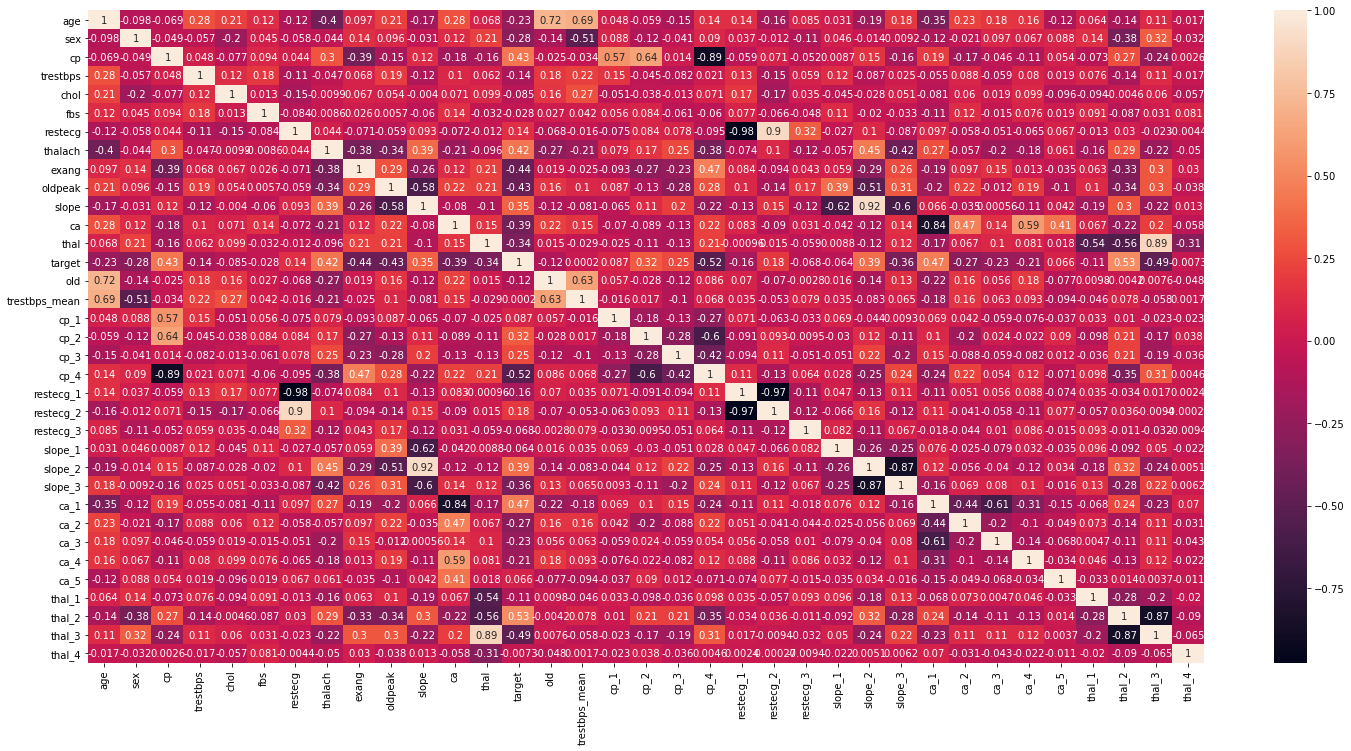

In [39]:
fig, ax = plt.subplots(figsize=(25, 12))
sns.heatmap(df_r.corr(), annot=True)

In [62]:
a = [7.84, 7.62, 7.57, 7.55, 7.46, 7.39, 7.36, 7.32, 7.28, 7.27]
b = ['Финляндия', 'Дания', 'Швейцария', 'Исландия', 'Нидерланды', 'Норвегия', 'Швеция', 'Люксембург', 'Новая Зеландия', 'Австрия']

round(sum(a)/len(a), 3)

7.466